Force on element 2 due to 1 (F12): [ 0.e+00 -1.e-07  0.e+00]
Force on element 1 due to 2 (F21): [-0.e+00  1.e-07  0.e+00]
F1 + F2 = [0. 0. 0.]


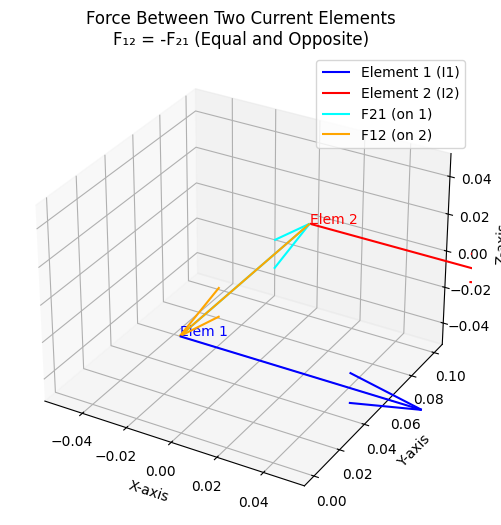

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu0 = 4 * np.pi * 1e-7


I1, I2 = 1.0, 1.0
dl1 = np.array([1, 0, 0]) * 0.1
dl2 = np.array([1, 0, 0]) * 0.1


r1 = np.array([0, 0, 0])
r2 = np.array([0, 0.1, 0])


r12 = r2 - r1
r21 = -r12


F12 = (mu0 / (4 * np.pi)) * (I1 * I2) * np.cross(dl2, np.cross(dl1, r12)) / (np.linalg.norm(r12)**3)


F21 = (mu0 / (4 * np.pi)) * (I1 * I2) * np.cross(dl1, np.cross(dl2, r21)) / (np.linalg.norm(r21)**3)

print("Force on element 2 due to 1 (F12):", F12)
print("Force on element 1 due to 2 (F21):", F21)
print("F1 + F2 =", F12 + F21)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')


ax.quiver(r1[0], r1[1], r1[2], dl1[0], dl1[1], dl1[2], color='blue', label='Element 1 (I1)')
ax.quiver(r2[0], r2[1], r2[2], dl2[0], dl2[1], dl2[2], color='red', label='Element 2 (I2)')

ax.quiver(r1[0], r1[1], r1[2], F21[0]*1e6, F21[1]*1e6, F21[2]*1e6, color='cyan', label='F21 (on 1)')
ax.quiver(r2[0], r2[1], r2[2], F12[0]*1e6, F12[1]*1e6, F12[2]*1e6, color='orange', label='F12 (on 2)')


ax.text(*r1, "Elem 1", color='blue')
ax.text(*r2, "Elem 2", color='red')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title("Force Between Two Current Elements\nF₁₂ = -F₂₁ (Equal and Opposite)")
ax.legend()
ax.grid(True)

plt.show()
